In [3]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import io

temp1= """month growth
0 34%
1 50%
2 32%
3 12%
4 66%
5 75%
6 100%
7 48%
8 89%
9 11%
10 6%
11 71%
"""
temp_csv= io.StringIO(temp1)

In [6]:
df= pd.read_csv(temp_csv, sep='\s+');
df

,month,growth
0,0,34%
1,1,50%
2,2,32%
3,3,12%
4,4,66%
5,5,75%
6,6,100%
7,7,48%
8,8,89%
9,9,11%


In [7]:
df.dtypes

month      int64
growth    object
dtype: object

<BarContainer object of 12 artists>

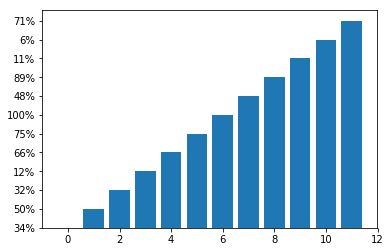

In [10]:
plt.bar(df.month, df.growth)

In [11]:
df.growth.astype(float)

ValueError: could not convert string to float: '71%'

In [14]:
test_series=df.growth
test_series= test_series.str.strip('%')

In [15]:
test_series= test_series.astype(float)
test_series

0      34.0
1      50.0
2      32.0
3      12.0
4      66.0
5      75.0
6     100.0
7      48.0
8      89.0
9      11.0
10      6.0
11     71.0
Name: growth, dtype: float64

In [16]:
test_series= test_series/100
test_series

0     0.34
1     0.50
2     0.32
3     0.12
4     0.66
5     0.75
6     1.00
7     0.48
8     0.89
9     0.11
10    0.06
11    0.71
Name: growth, dtype: float64

In [17]:
df.growth= df.growth.str.strip('%').astype(float)/100
df

,month,growth
0,0,0.34
1,1,0.50
2,2,0.32
3,3,0.12
4,4,0.66
5,5,0.75
6,6,1.00
7,7,0.48
8,8,0.89
9,9,0.11


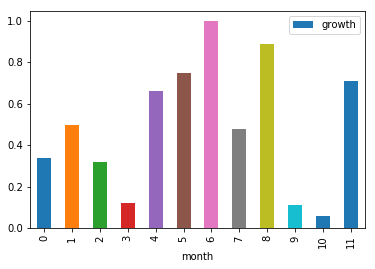

In [21]:
df.plot('month', 'growth',kind='bar')

In [22]:
import calendar

In [23]:
test_month= df.month
test_month

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
Name: month, dtype: int64

In [26]:
test_month.apply(lambda x: calendar.month_abbr[x+1])

0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
Name: month, dtype: object

In [27]:
df.month= df.month.apply(lambda x: calendar.month_abbr[x+1])

<BarContainer object of 12 artists>

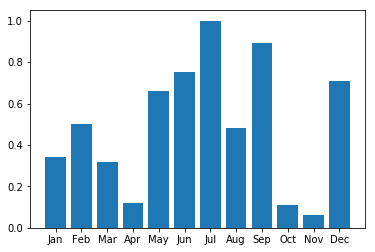

In [30]:
plt.bar(df.month, df.growth)

In [34]:
def p2f(prcnt_str):
    return float(prcnt_str.strip('%'))/100

def month_num_to_name(month_num):
    '''indexing starts at 1! Assumes calendar libarary is imported'''
    return calendar.month_abbr[int(month_num)+1]

In [35]:
temp_csv2= io.StringIO(temp1);
df2=pd.read_csv(temp_csv2, delimiter='\s+', converters={'growth': p2f, 'month': month_num_to_name})

In [36]:
df2

,month,growth
0,Jan,0.34
1,Feb,0.50
2,Mar,0.32
3,Apr,0.12
4,May,0.66
5,Jun,0.75
6,Jul,1.00
7,Aug,0.48
8,Sep,0.89
9,Oct,0.11
